# Real network

Corresponding to Cahpter 3.5, 3.7 in the book [Network Science Book](https://www.networksciencebook.com/) by Albert-László Barabási



In [1]:
!pip install numpy pandas matplotlib networkx  

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Load datasets


In [2]:
graph_list=[]
name_list=[]

### C. elegans Connectome Dataset

Number of nodes: 260
Number of edges: 950


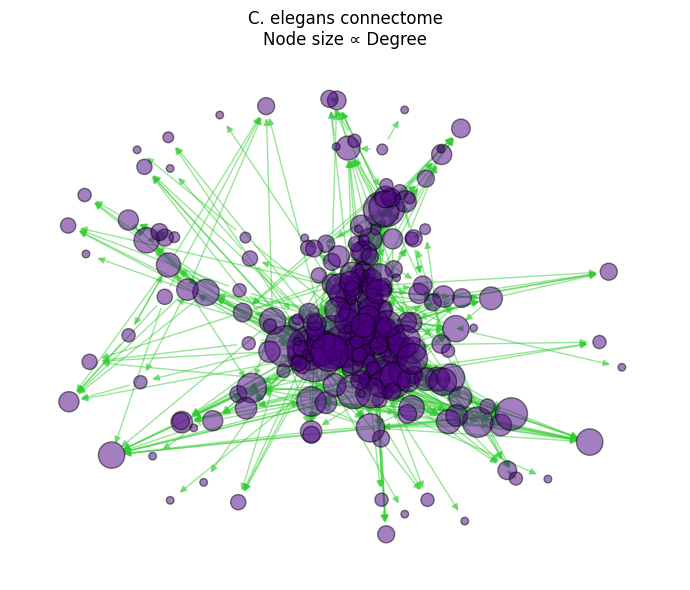

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# downloaded from https://www.wormwiring.org/
df = pd.read_excel('./Data/celegans_connectome.xlsx')
chemical_synapses = df[df['Type'] == 'S']

# Inspect the DataFrame to identify the correct columns
# print(df.columns)

G_celegans = nx.from_pandas_edgelist(chemical_synapses, source='Neuron 1', target='Neuron 2', create_using=nx.DiGraph())
graph_list.append(G_celegans)
name_list.append("C. elegans connectome")

print(f"Number of nodes: {G_celegans.number_of_nodes()}")
print(f"Number of edges: {G_celegans.number_of_edges()}")

def visualize_graph_with_degree_size(G, layout_func=nx.spring_layout, title="Graph Visualization"):
    """
    Visualize a graph where node size is proportional to its degree.
    
    Parameters:
        G (networkx.Graph): The input graph
        layout_func (function): Layout function like nx.spring_layout
        title (str): Title of the plot
    """
    degrees = dict(G.degree())
    node_sizes = [v * 30 for v in degrees.values()]  # scale factor

    pos = layout_func(G, seed=9)

    plt.figure(figsize=(7, 6))
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='indigo', edgecolors='black',alpha=0.5)
    nx.draw_networkx_edges(G, pos, alpha=0.5,edge_color='limegreen')
    # nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title(f"{title}\nNode size ∝ Degree")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_graph_with_degree_size(G_celegans, title="C. elegans connectome")

note: positions of nodes are still randomly generated, same below

### Drosophila brain Connectome Dataset

In [4]:
# downloaded from https://zenodo.org/records/10676866
# Dorkenwald, S., Matsliah, A., Sterling, A.R. et al. Neuronal wiring diagram of an adult brain. Nature 634, 124–138 (2024). https://doi.org/10.1038/s41586-024-07558-y


# note: | Abbreviation | Full Name               | Type                            | Typical Function                                   |
# | ------------ | ----------------------- | ------------------------------- | -------------------------------------------------- |
# | **GABA**     | Gamma-Aminobutyric Acid | Inhibitory                      | Reduces neuronal activity; calming                 |
# | **ACH**      | Acetylcholine           | Mixed (often excitatory in CNS) | Motor control, attention, memory                   |
# | **GLUT**     | Glutamate               | Excitatory                      | Main excitatory neurotransmitter; learning, memory |

df = pd.read_csv('./Data/drosophila_brain_connectome.csv')


# Inspect the DataFrame to identify the correct columns
# print(df.columns)

G_drosophila_brain = nx.from_pandas_edgelist(df, source='pre_root_id', target='post_root_id', create_using=nx.DiGraph())
graph_list.append(G_drosophila_brain)
name_list.append("Drosophila brain connectome")

print(f"Number of nodes: {G_drosophila_brain.number_of_nodes()}")
print(f"Number of edges: {G_drosophila_brain.number_of_edges()}")

Number of nodes: 134181
Number of edges: 2700513


### Drosophila VNC Connectome Dataset

In [5]:
# downloaded from https://console.cloud.google.com/storage/browser/flyem-manc-exports?inv=1&invt=AbyYUw
# https://www.janelia.org/project-team/flyem/manc-connectome

df = pd.read_csv('./Data/drosophila_VNC_connectome.csv')

G_drosophila_VNC = nx.from_pandas_edgelist(df, source='bodyId_pre', target='bodyId_post', create_using=nx.DiGraph())
graph_list.append(G_drosophila_VNC)
name_list.append("Drosophila VNC connectome")

print(f"Number of nodes: {G_drosophila_VNC.number_of_nodes()}")
print(f"Number of edges: {G_drosophila_VNC.number_of_edges()}")

Number of nodes: 23188
Number of edges: 5243574


### Scientific Collaboration Network (COLLAB Dataset)

In [6]:
import networkx as nx

# Condensed matter collaborations 2005 download from https://websites.umich.edu/~mejn/netdata/

# Let's convert the 209th graph in the dataset

G_collab = nx.read_gml("./Data/cond-mat-2005/cond-mat-2005.gml", label="id")
graph_list.append(G_collab)
name_list.append("Collaboration network")

print(f"Number of nodes: {G_collab.number_of_nodes()}")
print(f"Number of edges: {G_collab.number_of_edges()}")
# visualize_graph_with_degree_size(G_collab, title="Collaboration network")

Number of nodes: 40421
Number of edges: 175692


### Social network (Facebook)

Number of nodes: 4039
Number of edges: 88234


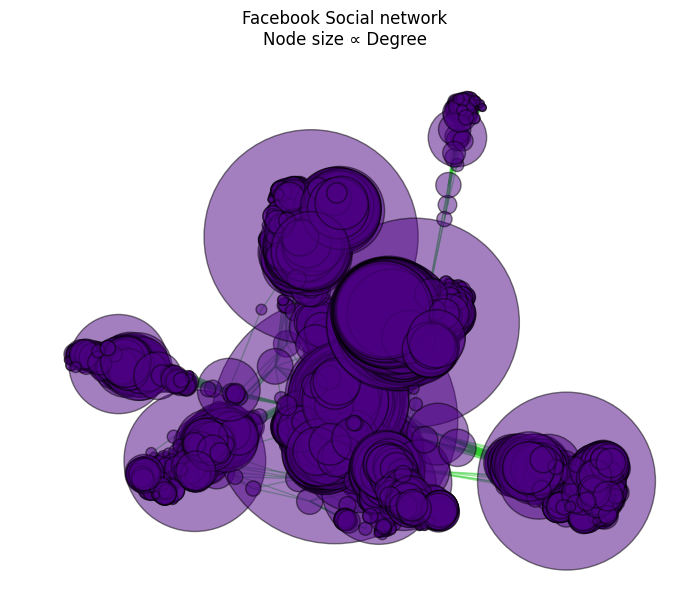

In [7]:
# Download from Stanford Large Network Dataset Collection https://snap.stanford.edu/data/ego-Facebook.html

import networkx as nx

# Load an edge list
G_social =  nx.read_edgelist("./Data/facebook_combined.txt", nodetype=int)
graph_list.append(G_social)
name_list.append("Facebook Social network")

print(f"Number of nodes: {G_social.number_of_nodes()}")
print(f"Number of edges: {G_social.number_of_edges()}")

visualize_graph_with_degree_size(G_social, title="Facebook Social network")

### Web graph (WWW 2002)

In [8]:
# Download from Stanford Large Network Dataset Collection https://snap.stanford.edu/data/web-BerkStan.html

import networkx as nx

# Load an edge list
G_www =  nx.read_edgelist("./Data/web-BerkStan.txt", nodetype=int)
graph_list.append(G_www)
name_list.append("Web Graph BerkStan 2002")

print(f"Number of nodes: {G_www.number_of_nodes()}")
print(f"Number of edges: {G_www.number_of_edges()}")

# visualize_graph_with_degree_size(G_www, title="Web Graph BerkStan 2002")

Number of nodes: 685230
Number of edges: 6649470


## degree distribution for real network

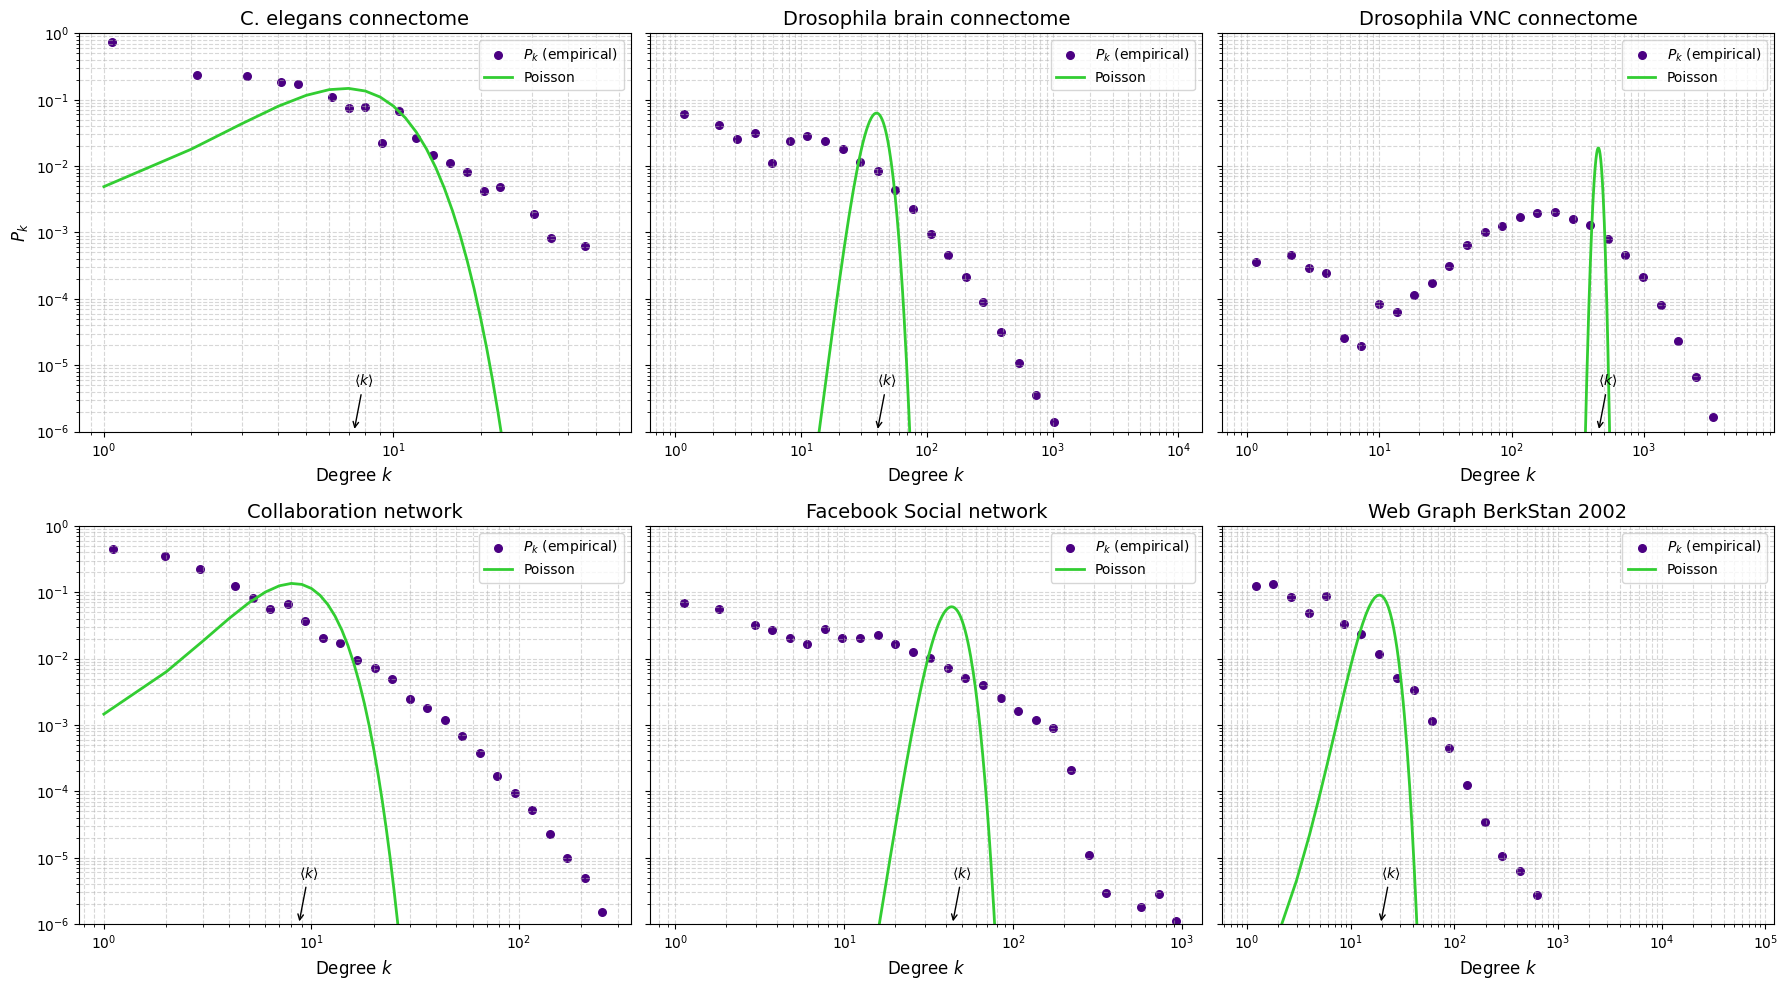

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scipy.stats as stats

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scipy.stats as stats

def log_binned_degree_distribution(degrees, bins=30):
    """
    Compute log-binned degree distribution: returns midpoints and probability density.
    """
    degrees = np.array(degrees)
    min_deg = max(degrees.min(), 1)  # avoid log(0)
    max_deg = degrees.max()
    log_bins = np.logspace(np.log10(min_deg), np.log10(max_deg), bins)

    hist, bin_edges = np.histogram(degrees, bins=log_bins, density=True)
    bin_centers = (bin_edges[:-1] * bin_edges[1:])**0.5  # geometric mean
    return bin_centers, hist

def plot_log_degree_distributions(graph_list, titles=None, bins=30):
    n_graphs = len(graph_list)
    fig, axes = plt.subplots(2, int(n_graphs/2), figsize=(6 *  int(n_graphs/2), 5*2), sharey=True)

    if n_graphs == 1:
        axes = [axes]
    if len(np.shape(axes)) >1:
        axes = axes.flatten()
    for i, (G, ax) in enumerate(zip(graph_list, axes)):
        
        degrees = [d for _, d in G.degree()]
        k_avg = np.mean(degrees)

        # Log-binned empirical degree distribution
        k_vals, pk_vals = log_binned_degree_distribution(degrees, bins=bins)

        # Poisson distribution (binned)
        k_range = np.arange(0, int(np.max(k_vals)) + 10)
        poisson_probs = stats.poisson.pmf(k_range, mu=k_avg)
        poisson_k = k_range[k_range > 0]
        poisson_pk = poisson_probs[k_range > 0]

        # Plot
        ax.scatter(k_vals, pk_vals, color="indigo", s=30, label=r"$P_k$ (empirical)")
        ax.plot(poisson_k, poisson_pk, color="limegreen", lw=2, label="Poisson")

        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_ylim([10**(-6),10**(0)])
        ax.set_xlabel("Degree $k$", fontsize=12)
        if i == 0:
            ax.set_ylabel(r"$P_k$", fontsize=12)

        title = titles[i] if titles else f"Graph {i+1}"
        ax.set_title(title, fontsize=14)
        ax.grid(True, which="both", linestyle='--', alpha=0.5)
        ax.legend(fontsize=10)

        # Indicate <k>
        ax.annotate(r"$\langle k \rangle$", xy=(k_avg, 1e-6), xytext=(k_avg, 5e-6),
                    arrowprops=dict(arrowstyle='->'), fontsize=10)

    plt.tight_layout()
    plt.show()


plot_log_degree_distributions(graph_list,titles=name_list)

## Real networks are supercritical

In [14]:
for graph,name in zip(graph_list,name_list):
    if nx.is_directed(graph):
        print(f"Graph: {name}, Number of nodes: {graph.number_of_nodes()}, Number of edges: {graph.number_of_edges()}, logN: {np.log(graph.number_of_nodes())}, <k>: { graph.number_of_edges()/graph.number_of_nodes() }")
    else:
        print(f"Graph: {name}, Number of nodes: {graph.number_of_nodes()}, Number of edges: {graph.number_of_edges()}, logN: {np.log(graph.number_of_nodes())}, <k>: { graph.number_of_edges()/graph.number_of_nodes()*2 }")
   


Graph: C. elegans connectome, Number of nodes: 260, Number of edges: 950, logN: 5.560681631015528, <k>: 3.6538461538461537
Graph: Drosophila brain connectome, Number of nodes: 134181, Number of edges: 2700513, logN: 11.80694491376462, <k>: 20.125897109128715
Graph: Drosophila VNC connectome, Number of nodes: 23188, Number of edges: 5243574, logN: 10.051390182459624, <k>: 226.13308607900638
Graph: Collaboration network, Number of nodes: 40421, Number of edges: 175692, logN: 10.607104730879188, <k>: 8.693105069147226
Graph: Facebook Social network, Number of nodes: 4039, Number of edges: 88234, logN: 8.303752415563412, <k>: 43.69101262688784
Graph: Web Graph BerkStan 2002, Number of nodes: 685230, Number of edges: 6649470, logN: 13.43750982731079, <k>: 19.407994396042206
